### Mounting Data From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Installing Libraries

In [ ]:
pip install catboost

In [ ]:
pip install pyod

### Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import gc
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from imblearn.combine import SMOTETomek

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import TomekLinks

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb
from catboost import Pool, CatBoostClassifier, cv
from pyod.models.xgbod import XGBOD
from sklearn.metrics import precision_recall_curve
from xgboost import plot_importance

import warnings
import sys



In [ ]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


warnings.filterwarnings('ignore')

### Reading DataFile into a DataFrame

In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/Project1DS5500/creditcard.csv',sep=',')

In [ ]:
Dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
category_counts = Dataset['Class'].value_counts()
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']
value_mapping = { 0 : 'Not Fraud', 1 : 'Fraud' }
category_counts_df['Category'] = category_counts_df['Category'].map(value_mapping)

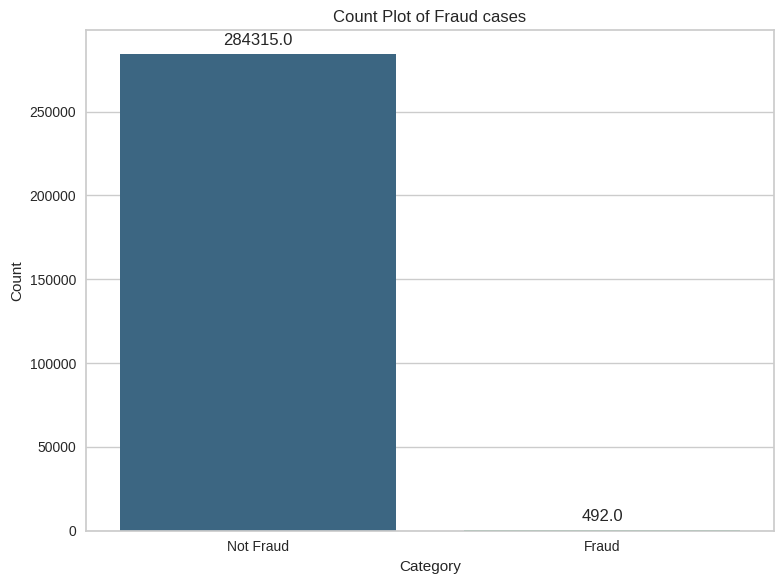

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', data=category_counts_df, y='Count' , palette='viridis')  # You can customize the color palette

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Plot of Fraud cases')
plt.tight_layout()

# Show the plot
plt.show()

### PreProcessing the DataSet

In [ ]:
PreprocessData = Dataset

Nothing is null so we dont have to ampute any values


In [ ]:
Dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Prepossing the Time column which is showing seconds into clock hours so we have a better understanding of time.

In [ ]:
PreprocessData['Time'] = PreprocessData['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)

In [ ]:
PreprocessData[:50]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,1.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,1.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,1.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,1.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


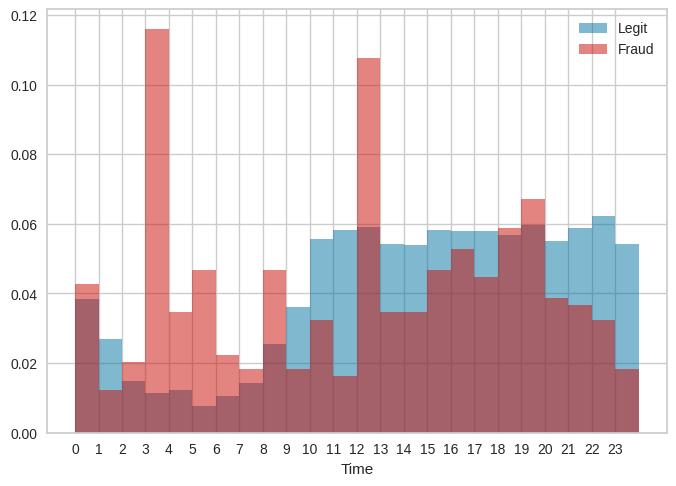

In [ ]:
bins = np.arange(PreprocessData['Time'].min(),PreprocessData['Time'].max()+2)
sns.distplot(PreprocessData[PreprocessData['Class']==0.0]['Time'],
                 norm_hist=True,
                 bins=bins,
                 kde=False,
                 color='b',
                 hist_kws={'alpha':.5},
                 label='Legit')
sns.distplot(PreprocessData[PreprocessData['Class']==1.0]['Time'],
                 norm_hist=True,
                 bins=bins,
                 kde=False,
                 color='r',
                 label='Fraud',
                 hist_kws={'alpha':.5})
plt.xticks(range(0,24))
plt.legend()
plt.show()

### Spliting the Dataset

Before we go further lets split the data into 80 - 20 split.

In [ ]:
DatasetForSplitting = PreprocessData

In [ ]:
PCAdataset = PreprocessData

In [ ]:
PCAdataset = PCAdataset.sample(frac=1)

In [ ]:
fraud_df = PCAdataset.loc[PCAdataset['Class'] == 1]
non_fraud_df = PCAdataset.loc[PCAdataset['Class'] == 0][:492]

pcadatasetfinal = pd.concat([fraud_df, non_fraud_df])

pcadatasetfinalProcessed = pcadatasetfinal.sample(frac=1, random_state=42)

In [ ]:
pcadatasetfinalProcessed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146884,1.0,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,0.338940,...,-0.271204,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0.99,0
95597,19.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1
96768,19.0,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,-0.762247,...,-0.110554,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,156.00,0
75511,16.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92,1
255556,20.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239499,18.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
43624,12.0,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,-1.140208,...,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,39.45,1
103626,20.0,-3.599934,4.022775,-2.735797,0.416448,-0.546681,1.114840,-3.332706,-3.035458,-2.103863,...,-2.353510,0.747557,0.369075,-1.460187,-0.041429,0.497594,-0.623617,0.009661,0.76,0
119714,21.0,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,...,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,29.95,1


In [ ]:
X = DatasetForSplitting.drop('Class', axis=1)  # Features
y = DatasetForSplitting['Class']  # Target variable

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
Xpca = pcadatasetfinalProcessed.drop('Class', axis=1)
ypca = pcadatasetfinalProcessed['Class']

In [ ]:
pca = PCA(n_components=2, random_state=42).fit_transform(Xpca.values)

In [ ]:
pca

array([[-104.42988298,   -7.25107303],
       [1248.82903156,    1.25840356],
       [  50.58784465,  -10.40390385],
       ...,
       [-104.66803527,   -7.08711135],
       [ -75.46694003,  -10.02296763],
       [ -87.43901618,    4.09938392]])

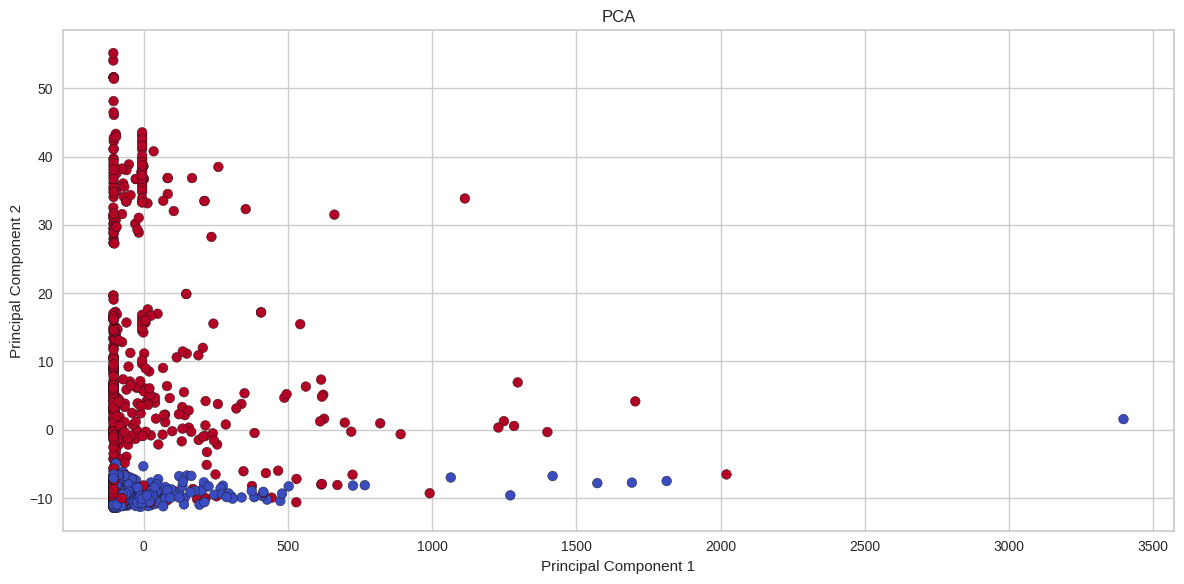

In [ ]:
# Plotting PCA results
plt.figure(figsize=(12, 6))
plt.title('PCA')
plt.scatter(pca[:, 0], pca[:, 1], c=ypca, cmap='coolwarm', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

### Scaling Columns using only the information from training data

All the columns are already scaled apart from the amount column we are going to go ahead and do that while using only the information from the training data.

In [ ]:
scaler = StandardScaler()
AmountColumnX_train = X_train[['Amount']]
AmountColumnX_train = scaler.fit_transform(AmountColumnX_train)
X_train['Amount'] = AmountColumnX_train

In [ ]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [ ]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,21.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,11.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,12.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,13.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,17.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,18.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-0.327798
85418,17.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,-0.204156
29062,10.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,-0.170533
13766,7.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,-0.348140


### Checking the performance of our models using K-fold validation and random search cv on the unbalanced dataset without any balancing tecniques applied to select the best ones.

In [ ]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_distributions': {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2'] , 'solver' : ['liblinear', 'newton-cg','sag']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_distributions': {}
    },
    'Linear Discriminant Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'param_distributions': {}
    },
    'BernouliNB': {
        'model': BernoulliNB(),
        'param_distributions': {}
    },
    'Decision Trees': {
        'model': DecisionTreeClassifier(),
        'param_distributions': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    }
}

Looping through each model and training it on the train set using Stratified K fold and performing Random search CV on each fold to get validation results

In [ ]:
def ValidationResults(models,type):
  columns = ['Model' , 'Class', 'Precision', 'Recall', 'F1-Score', 'Support']
  classification_reports_df = pd.DataFrame(columns=columns)
  smote = SMOTE(sampling_strategy='minority', random_state=42)
  rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
  smt = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'),random_state=42)
  for model_name, modelparams in models.items():
        print(f"\nTraining {model_name}...")

        # Create Stratified K-Fold Cross-Validator
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Lists to store results for each fold
        precision_list_fraud, recall_list_fraud, f1_score_list_fraud, support_list_fraud = [], [], [], []
        precision_list_notfraud, recall_list_notfraud, f1_score_list_notfraud, support_list_notfraud = [], [], [], []

        foldnumber = 1
        # Iterate over each fold
        for train_index, test_index in stratified_kfold.split(X_train, y_train):
            print("Processing fold number : ", foldnumber)
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            if type == "Smote":
              X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

            if type == "UnderSample":
              X_train_fold, y_train_fold = rus.fit_resample(X_train_fold, y_train_fold)

            if type == "SmoteTomek":
              X_train_fold, y_train_fold = smt.fit_resample(X_train_fold, y_train_fold)


            random_search = RandomizedSearchCV(modelparams['model'], param_distributions=modelparams['param_distributions'], cv=3)

            # Fit the model random search cv
            random_search.fit(X_train_fold, y_train_fold)

            # Make predictions on the test set
            y_pred = random_search.best_estimator_.predict(X_test_fold)

            # Fit the model
            # modelparams['model'].fit(X_train_fold, y_train_fold)

            # Make prediction on test fold
            # y_pred = modelparams['model'].predict(X_test_fold)

            # Generate classification report for the fold
            report_dict = classification_report(y_test_fold, y_pred, output_dict=True)

            # Extract relevant metrics for the fold
            metricsNotFraud = report_dict['0']
            metricsFraud = report_dict['1']
            precision_list_notfraud.append(metricsNotFraud['precision'])
            recall_list_notfraud.append(metricsNotFraud['recall'])
            f1_score_list_notfraud.append(metricsNotFraud['f1-score'])
            support_list_notfraud.append(metricsNotFraud['support'])

            precision_list_fraud.append(metricsFraud['precision'])
            recall_list_fraud.append(metricsFraud['recall'])
            f1_score_list_fraud.append(metricsFraud['f1-score'])
            support_list_fraud.append(metricsFraud['support'])

            foldnumber += 1

        # Calculate average metrics across folds
        avg_precision_not_fraud = sum(precision_list_notfraud) / len(precision_list_notfraud)
        avg_recall_not_fraud = sum(recall_list_notfraud) / len(recall_list_notfraud)
        avg_f1_score_notfraud = sum(f1_score_list_notfraud) / len(f1_score_list_notfraud)
        avg_support_notfraud = sum(support_list_notfraud) / len(support_list_notfraud)

        avg_precision_fraud = sum(precision_list_fraud) / len(precision_list_fraud)
        avg_recall_fraud = sum(recall_list_fraud) / len(recall_list_fraud)
        avg_f1_score_fraud = sum(f1_score_list_fraud) / len(f1_score_list_fraud)
        avg_support_fraud = sum(support_list_fraud) / len(support_list_fraud)

        rowfraud = [model_name, 'Fraud' , avg_precision_fraud, avg_recall_fraud, avg_f1_score_fraud, avg_support_fraud]
        rownotfraud = [model_name, 'NotFraud' , avg_precision_not_fraud, avg_recall_not_fraud, avg_f1_score_notfraud, avg_support_notfraud]


        new_rows = [
        pd.Series(rowfraud, index=columns),
        pd.Series(rownotfraud, index=columns)
        ]

        #Appending rows to the dataframe
        classification_reports_df = pd.concat([classification_reports_df] + [row.to_frame().T for row in new_rows], ignore_index=True)

  return classification_reports_df

In [ ]:
Classificaition_Report_Unbalanced_df = ValidationResults(models,"NoBalance")


Training Logistic Regression...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Random Forest...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Linear Discriminant Analysis...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training BernouliNB...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Decision Trees...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5


In [ ]:
Classificaition_Report_Unbalanced_df

,Model,Class,Precision,Recall,F1-Score,Support
0,Logistic Regression,Fraud,0.875159,0.642097,0.739638,78.8
1,Logistic Regression,NotFraud,0.99938,0.999837,0.999609,45490.2
2,Random Forest,Fraud,0.937484,0.776599,0.848724,78.8
3,Random Forest,NotFraud,0.999613,0.999908,0.99976,45490.2
4,Linear Discriminant Analysis,Fraud,0.878622,0.761409,0.815061,78.8
5,Linear Discriminant Analysis,NotFraud,0.999587,0.999815,0.999701,45490.2
6,BernouliNB,Fraud,0.841698,0.639598,0.72445,78.8
7,BernouliNB,NotFraud,0.999376,0.999789,0.999582,45490.2
8,Decision Trees,Fraud,0.893215,0.748718,0.81386,78.8
9,Decision Trees,NotFraud,0.999565,0.999842,0.999703,45490.2


Checking results on Acutual TestSet for Selected Models

In [ ]:
modelselectedUnbalanced = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        #'param_distributions': {'n_estimators': randint(50, 200), 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        'param_distributions': {}
    },
    'Linear Discriminant Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'param_distributions': {}
    }
}

In [ ]:
def getResultsOnFinalDataset(models,type,Random):
  columns = ['Model' , 'Class', 'Precision', 'Recall', 'F1-Score', 'Support']
  classification_reports_df = pd.DataFrame(columns=columns)

  XtrainFortesting = X_train
  YtrainFortesting = y_train

  if type == "Smote":
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    XtrainFortesting, YtrainFortesting = smote.fit_resample(XtrainFortesting, YtrainFortesting)

  if type == "UnderSample":
    rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    XtrainFortesting, YtrainFortesting = rus.fit_resample(XtrainFortesting, YtrainFortesting)

  if type == "SmoteTomek":
    smt = SMOTETomek(random_state=42)
    XtrainFortesting, YtrainFortesting = smt.fit_resample(XtrainFortesting, YtrainFortesting)


  for model_name, modelparams in models.items():

      print("Current processing model :",model_name)

      if Random:
        random_search = RandomizedSearchCV(modelparams['model'], param_distributions=modelparams['param_distributions'], cv=3)
        # Fit the model
        random_search.fit(XtrainFortesting, YtrainFortesting)
        # Make predictions on the test set
        y_pred = random_search.best_estimator_.predict(X_test)

      else:
        if model_name == "CatBoost":
          modelparams['model'].fit(XtrainFortesting,YtrainFortesting,eval_set=(X_test,y_test))
        else:
          modelparams['model'].fit(XtrainFortesting,YtrainFortesting)
        y_pred = modelparams['model'].predict(X_test)

      # Generate classification report for the fold
      report_dict = classification_report(y_test, y_pred, output_dict=True)

      metricsNotFraud = report_dict['0']
      metricsFraud = report_dict['1']

      rowfraud = [model_name, 'Fraud' , metricsFraud['precision'], metricsFraud['recall'], metricsFraud['f1-score'], metricsFraud['support']]
      rownotfraud = [model_name, 'NotFraud' , metricsNotFraud['precision'], metricsNotFraud['recall'], metricsNotFraud['f1-score'], metricsNotFraud['support']]

      new_rows = [
      pd.Series(rowfraud, index=columns),
      pd.Series(rownotfraud, index=columns)
      ]

      #Appending rows to the dataframe
      classification_reports_df = pd.concat([classification_reports_df] + [row.to_frame().T for row in new_rows], ignore_index=True)

  return classification_reports_df

In [ ]:
classification_report_final_result_nobalancing = getResultsOnFinalDataset(modelselectedUnbalanced,"NoBalance",False)

Current processing model : Random Forest
Current processing model : Linear Discriminant Analysis


In [ ]:
classification_report_final_result_nobalancing

,Model,Class,Precision,Recall,F1-Score,Support
0,Random Forest,Fraud,0.940476,0.806122,0.868132,98
1,Random Forest,NotFraud,0.999666,0.999912,0.999789,56864
2,Linear Discriminant Analysis,Fraud,0.822917,0.806122,0.814433,98
3,Linear Discriminant Analysis,NotFraud,0.999666,0.999701,0.999683,56864


In [ ]:
ypredRandomForestNoBalance = modelselectedUnbalanced['Random Forest']['model'].predict(X_test)
ypredLDANoBalance = modelselectedUnbalanced['Linear Discriminant Analysis']['model'].predict(X_test)

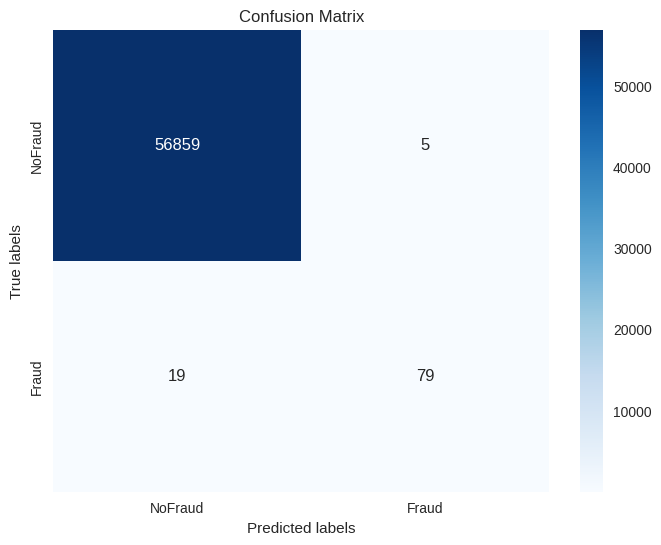

In [ ]:
cm = confusion_matrix(y_test, ypredRandomForestNoBalance)
target_names = ['NoFraud','Fraud']
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

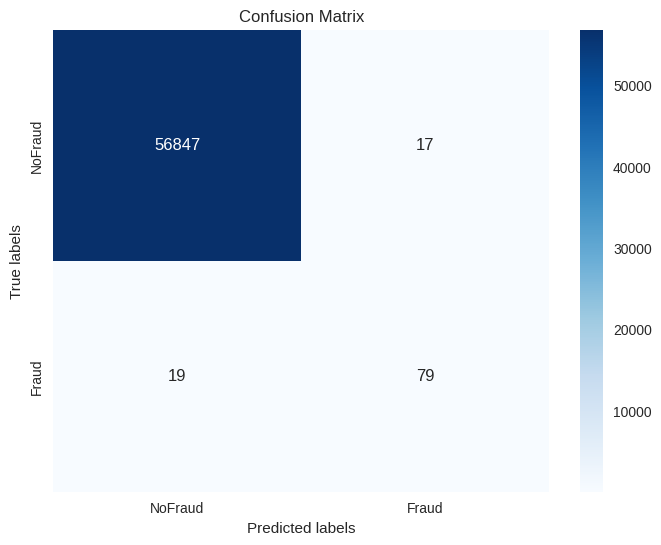

In [ ]:
cm = confusion_matrix(y_test, ypredLDANoBalance)
target_names = ['NoFraud','Fraud']
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
ypredRandomForestNoBalanceProb = modelselectedUnbalanced['Random Forest']['model'].predict_proba(X_test)
ypredLDANoBalanceProb = modelselectedUnbalanced['Linear Discriminant Analysis']['model'].predict_proba(X_test)

In [ ]:
ypredRandomForestNoBalanceProb = ypredRandomForestNoBalanceProb[:, 1]
ypredLDANoBalanceProb = ypredLDANoBalanceProb[:, 1]

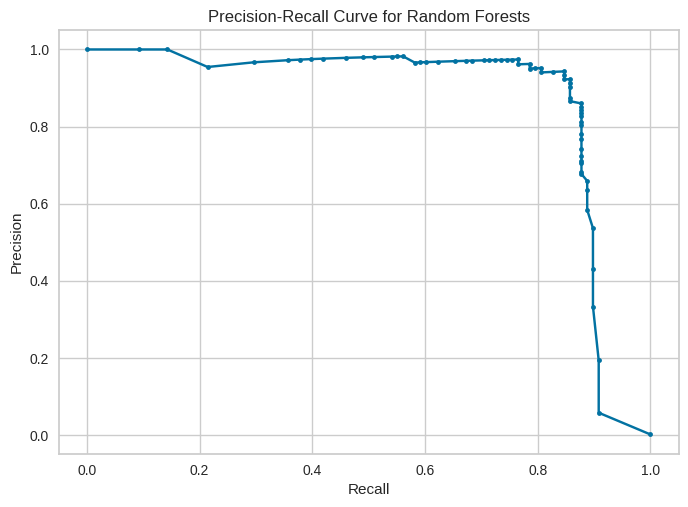

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredRandomForestNoBalanceProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forests')
plt.grid(True)
plt.show()
# Plot precision-recall cu

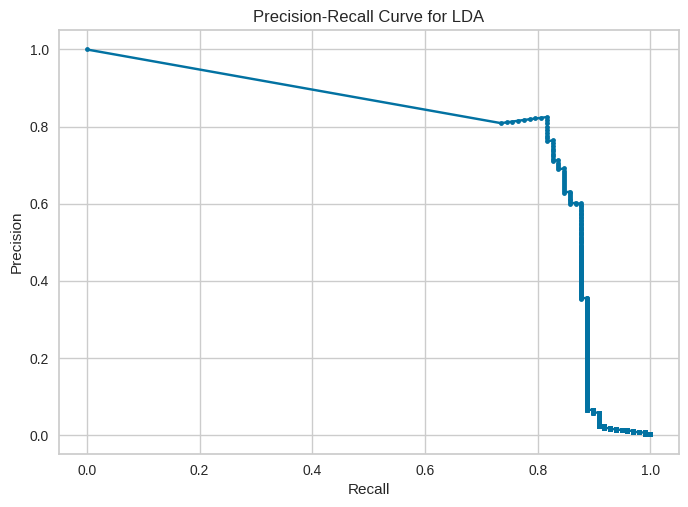

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredLDANoBalanceProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LDA')
plt.grid(True)
plt.show()
# Plot precision-recall cu

### Doing SMOTE Applying SMOTE to check performance of the Models if it increases or decreases it.

In [ ]:
modelsSM = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_distributions': {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2'] , 'solver' : ['liblinear', 'newton-cg','sag']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_distributions': {}
    },
    'Linear Discriminant Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'param_distributions': {}
    },
    'BernouliNB': {
        'model': BernoulliNB(),
        'param_distributions': {}
    },
    'Decision Trees': {
        'model': DecisionTreeClassifier(),
        'param_distributions': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    }
}

In [ ]:
Classificaition_Report_Smote_df = ValidationResults(modelsSM,"Smote")


Training Logistic Regression...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Random Forest...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Linear Discriminant Analysis...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training BernouliNB...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Decision Trees...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5


In [ ]:
Classificaition_Report_Smote_df

,Model,Class,Precision,Recall,F1-Score,Support
0,Logistic Regression,Fraud,0.057175,0.903635,0.107515,78.8
1,Logistic Regression,NotFraud,0.999829,0.9741,0.986796,45490.2
2,Random Forest,Fraud,0.877401,0.789354,0.829707,78.8
3,Random Forest,NotFraud,0.999635,0.999807,0.999721,45490.2
4,Linear Discriminant Analysis,Fraud,0.093738,0.81493,0.168068,78.8
5,Linear Discriminant Analysis,NotFraud,0.999675,0.986252,0.992918,45490.2
6,BernouliNB,Fraud,0.157516,0.812269,0.262948,78.8
7,BernouliNB,NotFraud,0.999672,0.992315,0.99598,45490.2
8,Decision Trees,Fraud,0.350694,0.763973,0.479581,78.8
9,Decision Trees,NotFraud,0.99959,0.997525,0.998556,45490.2


In [ ]:
modelselectedSmote = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        #'param_distributions': {'n_estimators': randint(50, 200), 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        'param_distributions': {}
    },
    'Decision Trees': {
        'model': DecisionTreeClassifier(),
        'param_distributions': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    }
}

In [ ]:
classification_report_final_result_smote = getResultsOnFinalDataset(modelselectedSmote,"Smote",False)

Current processing model : Random Forest
Current processing model : Decision Trees


In [ ]:
classification_report_final_result_smote

,Model,Class,Precision,Recall,F1-Score,Support
0,Random Forest,Fraud,0.860215,0.816327,0.837696,98
1,Random Forest,NotFraud,0.999683,0.999771,0.999727,56864
2,Decision Trees,Fraud,0.377551,0.755102,0.503401,98
3,Decision Trees,NotFraud,0.999577,0.997855,0.998715,56864


In [ ]:
ypredRandomForestSmoteProb = modelselectedSmote['Random Forest']['model'].predict_proba(X_test)
ypredDecisionTreesSmoteProb = modelselectedSmote['Decision Trees']['model'].predict_proba(X_test)

In [ ]:
ypredRandomForestSmoteProb = ypredRandomForestSmoteProb[:, 1]
ypredDecisionTreesSmoteProb = ypredDecisionTreesSmoteProb[:, 1]

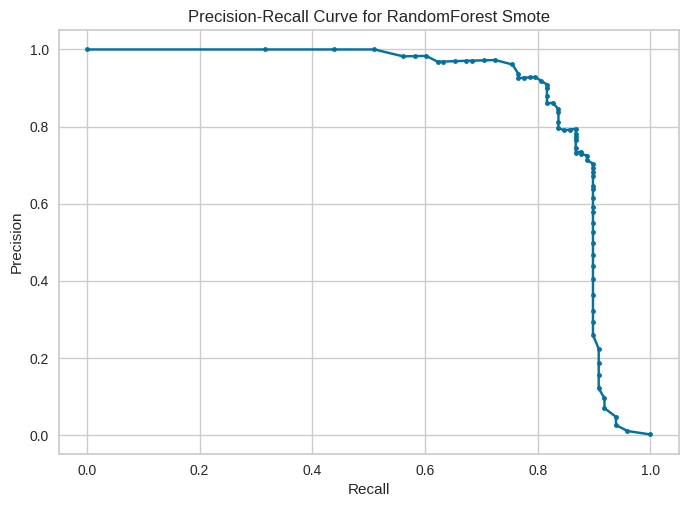

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredRandomForestSmoteProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForest Smote')
plt.grid(True)
plt.show()
# Plot precision-recall cu

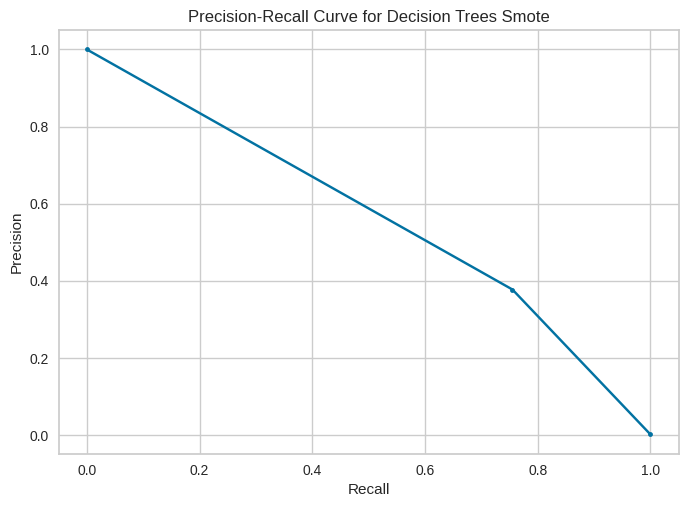

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredDecisionTreesSmoteProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Trees Smote')
plt.grid(True)
plt.show()
# Plot precision-recall cu

### Applying UnderSampling to check performance of the Models if it increases or decreases it.

In [ ]:
modelsUS = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_distributions': {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2'] , 'solver' : ['liblinear', 'newton-cg','sag']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_distributions': {}
    },
    'Linear Discriminant Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'param_distributions': {}
    },
    'BernouliNB': {
        'model': BernoulliNB(),
        'param_distributions': {}
    },
    'Decision Trees': {
        'model': DecisionTreeClassifier(),
        'param_distributions': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    }
}

In [ ]:
Classificaition_Report_UnderSample_df = ValidationResults(modelsUS,"UnderSample")


Training Logistic Regression...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Random Forest...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Linear Discriminant Analysis...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training BernouliNB...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Decision Trees...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5


In [ ]:
Classificaition_Report_UnderSample_df

,Model,Class,Precision,Recall,F1-Score,Support
0,Logistic Regression,Fraud,0.029879,0.921422,0.057871,78.8
1,Logistic Regression,NotFraud,0.999856,0.947945,0.973205,45490.2
2,Random Forest,Fraud,0.053596,0.903668,0.101069,78.8
3,Random Forest,NotFraud,0.999828,0.971814,0.985617,45490.2
4,Linear Discriminant Analysis,Fraud,0.06897,0.842843,0.127487,78.8
5,Linear Discriminant Analysis,NotFraud,0.999722,0.980211,0.98987,45490.2
6,BernouliNB,Fraud,0.132204,0.814833,0.226857,78.8
7,BernouliNB,NotFraud,0.999676,0.990556,0.995095,45490.2
8,Decision Trees,Fraud,0.015941,0.929049,0.031324,78.8
9,Decision Trees,NotFraud,0.999863,0.897477,0.945824,45490.2


In [ ]:
modelselectedUnderSample = {
    'Linear Discriminant Analysis': {
        'model': LinearDiscriminantAnalysis(),
        'param_distributions': {}
    },
    'BernouliNB': {
        'model': BernoulliNB(),
        'param_distributions': {}
    }
}

In [ ]:
classification_report_final_result_UnderSample = getResultsOnFinalDataset(modelselectedUnderSample,"UnderSample",False)

Current processing model : Linear Discriminant Analysis
Current processing model : BernouliNB


In [ ]:
classification_report_final_result_UnderSample

,Model,Class,Precision,Recall,F1-Score,Support
0,Linear Discriminant Analysis,Fraud,0.084016,0.836735,0.1527,98
1,Linear Discriminant Analysis,NotFraud,0.999714,0.984278,0.991936,56864
2,BernouliNB,Fraud,0.155009,0.836735,0.261563,98
3,BernouliNB,NotFraud,0.999716,0.992139,0.995913,56864


In [ ]:
ypredLDANoUnderSampleProb = modelselectedUnderSample['Linear Discriminant Analysis']['model'].predict_proba(X_test)
ypredBernouliUnderSampleProb = modelselectedUnderSample['BernouliNB']['model'].predict_proba(X_test)

In [ ]:
ypredLDANoUnderSampleProb = ypredLDANoUnderSampleProb[:, 1]
ypredBernouliUnderSampleProb = ypredBernouliUnderSampleProb[:, 1]

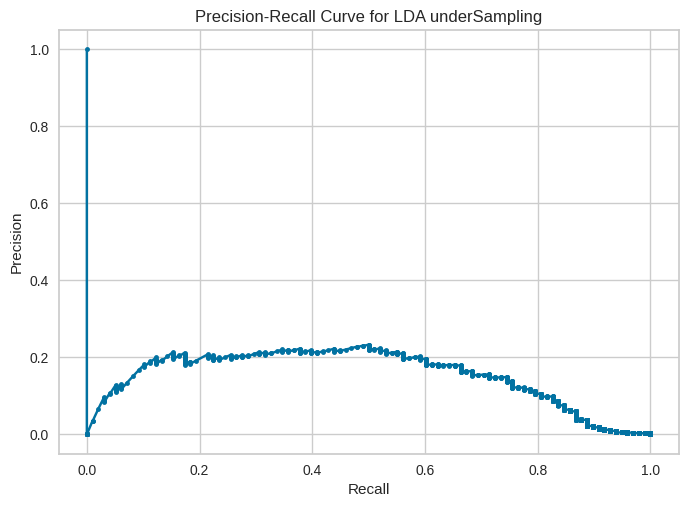

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredLDANoUnderSampleProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LDA underSampling')
plt.grid(True)
plt.show()
# Plot precision-recall cu

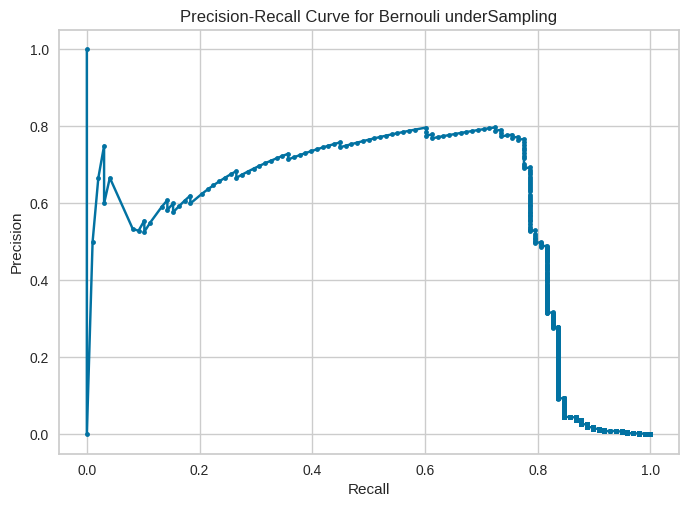

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredBernouliUnderSampleProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Bernouli underSampling')
plt.grid(True)
plt.show()
# Plot precision-recall cu

### After over initial Models we are going to get results using boosting Algorithms using the same tecniques we used on the previous Models.

In [ ]:
modelsBoosting = {
    'X-gBoost': {
        'model': xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05),
        'param_distributions': {}
    },
    'CatBoost': {
        'model': CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42),
        'param_distributions': {}
    }
    # 'XgBoD': {
    #     'model':  XGBOD(n_estimators=100, max_depth=10) ,
    #     'param_distributions': {}
    # },
}

In [ ]:
Classificaiton_report_boosting_algorithms_unbalanced = getResultsOnFinalDataset(modelsBoosting,"Nobalance",False)

Current processing model : X-gBoost
Current processing model : CatBoost
Learning rate set to 0.121128
0:	learn: 0.9986833	test: 0.9985956	best: 0.9985956 (0)	total: 135ms	remaining: 2m 14s
1:	learn: 0.9982708	test: 0.9982796	best: 0.9985956 (0)	total: 261ms	remaining: 2m 10s
2:	learn: 0.9982839	test: 0.9982796	best: 0.9985956 (0)	total: 400ms	remaining: 2m 12s
3:	learn: 0.9988589	test: 0.9988940	best: 0.9988940 (3)	total: 569ms	remaining: 2m 21s
4:	learn: 0.9990959	test: 0.9989642	best: 0.9989642 (4)	total: 698ms	remaining: 2m 18s
5:	learn: 0.9993768	test: 0.9993680	best: 0.9993680 (5)	total: 829ms	remaining: 2m 17s
6:	learn: 0.9994558	test: 0.9994031	best: 0.9994031 (6)	total: 1.07s	remaining: 2m 31s
7:	learn: 0.9994997	test: 0.9994558	best: 0.9994558 (7)	total: 1.28s	remaining: 2m 39s
8:	learn: 0.9995084	test: 0.9995436	best: 0.9995436 (8)	total: 1.47s	remaining: 2m 42s
9:	learn: 0.9995128	test: 0.9994909	best: 0.9995436 (8)	total: 1.78s	remaining: 2m 56s
10:	learn: 0.9995348	test: 0

In [ ]:
Classificaiton_report_boosting_algorithms_unbalanced

,Model,Class,Precision,Recall,F1-Score,Support
0,X-gBoost,Fraud,0.918605,0.806122,0.858696,98
1,X-gBoost,NotFraud,0.999666,0.999877,0.999771,56864
2,CatBoost,Fraud,0.964706,0.836735,0.896175,98
3,CatBoost,NotFraud,0.999719,0.999947,0.999833,56864


In [ ]:
ypredXgBoostNoBalance = modelsBoosting['X-gBoost']['model'].predict(X_test)
ypredCatBoostNoBalance = modelsBoosting['CatBoost']['model'].predict(X_test)

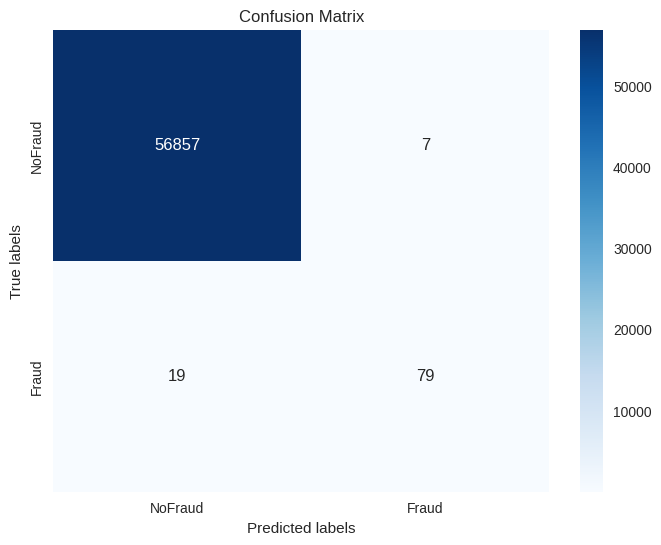

In [ ]:
cm = confusion_matrix(y_test, ypredXgBoostNoBalance)
target_names = ['NoFraud','Fraud']
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

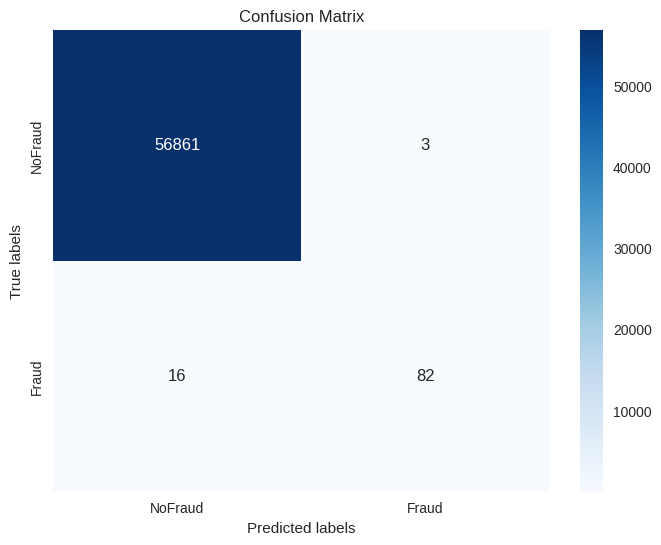

In [ ]:
cm = confusion_matrix(y_test, ypredCatBoostNoBalance)
target_names = ['NoFraud','Fraud']
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
ypredXgBoostNoBalanceProb = modelsBoosting['X-gBoost']['model'].predict_proba(X_test)
ypredCatBoostNoBalanceProb = modelsBoosting['CatBoost']['model'].predict_proba(X_test)

In [ ]:
ypredXgBoostNoBalanceProb = ypredXgBoostNoBalanceProb[:, 1]
ypredCatBoostNoBalanceProb = ypredCatBoostNoBalanceProb[:, 1]

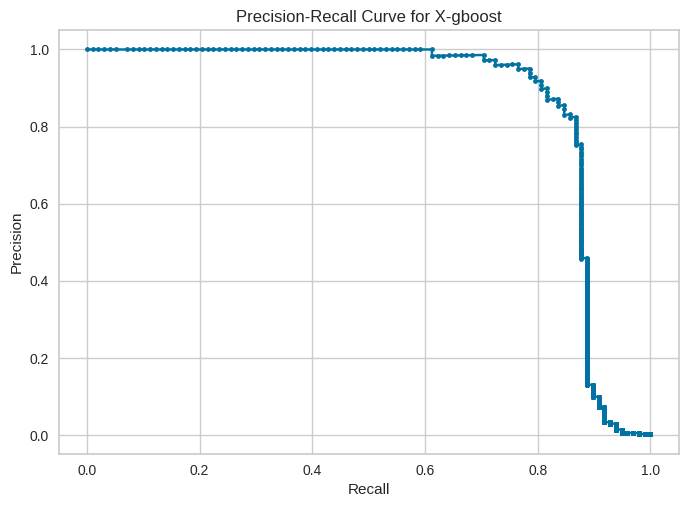

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredXgBoostNoBalanceProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for X-gboost')
plt.grid(True)
plt.show()
# Plot precision-recall cu

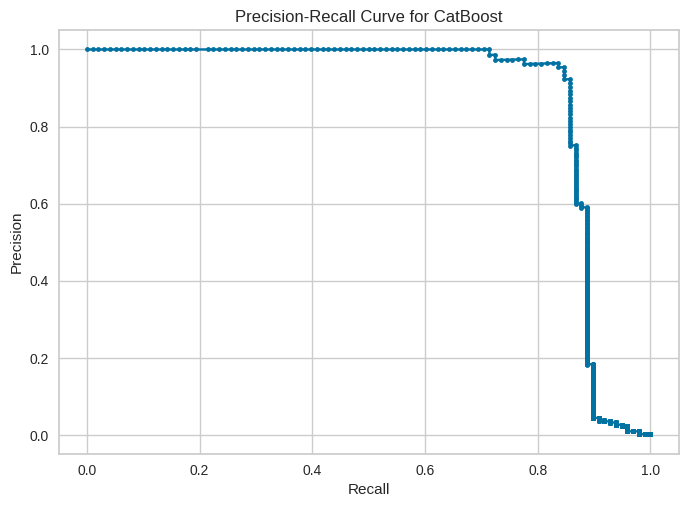

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, ypredCatBoostNoBalanceProb)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CatBoost')
plt.grid(True)
plt.show()
# Plot precision-recall cu

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

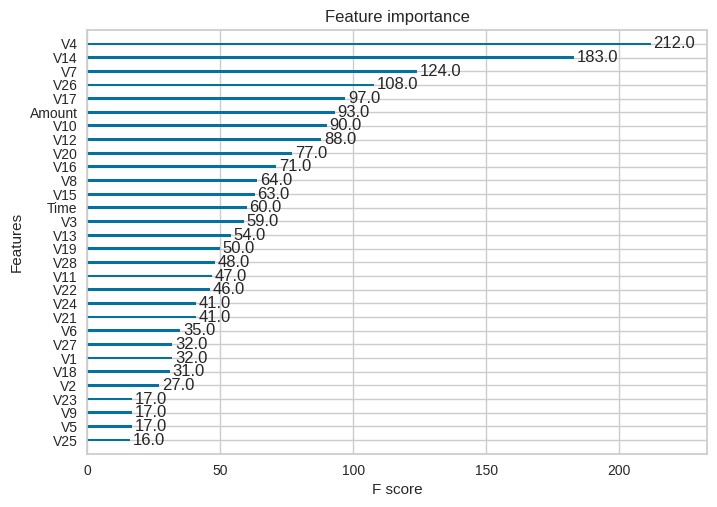

In [ ]:
plot_importance(modelsBoosting['X-gBoost']['model'])

In [ ]:
feature_importances = modelsBoosting['CatBoost']['model'].get_feature_importance()

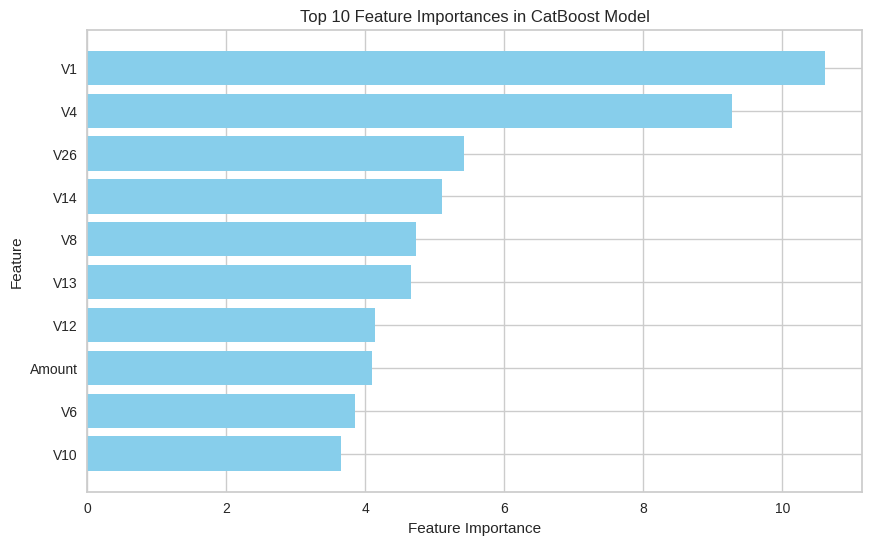

In [ ]:
sorted_indices = feature_importances.argsort()[::-1]

# Get top 10 feature indices
top_10_indices = sorted_indices[:10]

# Get corresponding feature names and importances
top_10_feature_names = [X_train.columns[i] for i in top_10_indices]
top_10_feature_importances = feature_importances[top_10_indices]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_feature_names)), top_10_feature_importances, align='center', color='skyblue')
plt.yticks(range(len(top_10_feature_names)), top_10_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in CatBoost Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
modelsBoostingSmote = {
    'X-gBoost': {
        'model': xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05),
        'param_distributions': {}
    },
    'CatBoost': {
        'model': CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42),
        'param_distributions': {}
    }
    # 'XgBoD': {
    #     'model':  XGBOD(n_estimators=100, max_depth=10) ,
    #     'param_distributions': {}
    # },
}

In [ ]:
Classificaiton_report_boosting_algorithms_smote = getResultsOnFinalDataset(modelsBoostingSmote,"Smote",False)

Current processing model : X-gBoost
Current processing model : CatBoost
Learning rate set to 0.143686
0:	learn: 0.9451266	test: 0.9715951	best: 0.9715951 (0)	total: 191ms	remaining: 3m 10s
1:	learn: 0.9495694	test: 0.9788104	best: 0.9788104 (1)	total: 330ms	remaining: 2m 44s
2:	learn: 0.9518600	test: 0.9755802	best: 0.9788104 (1)	total: 468ms	remaining: 2m 35s
3:	learn: 0.9539395	test: 0.9749307	best: 0.9788104 (1)	total: 611ms	remaining: 2m 32s
4:	learn: 0.9567533	test: 0.9800218	best: 0.9800218 (4)	total: 754ms	remaining: 2m 30s
5:	learn: 0.9583778	test: 0.9803378	best: 0.9803378 (5)	total: 886ms	remaining: 2m 26s
6:	learn: 0.9593121	test: 0.9817071	best: 0.9817071 (6)	total: 1.03s	remaining: 2m 26s
7:	learn: 0.9621479	test: 0.9816193	best: 0.9817071 (6)	total: 1.18s	remaining: 2m 26s
8:	learn: 0.9636801	test: 0.9825147	best: 0.9825147 (8)	total: 1.32s	remaining: 2m 25s
9:	learn: 0.9659443	test: 0.9847442	best: 0.9847442 (9)	total: 1.45s	remaining: 2m 24s
10:	learn: 0.9667313	test: 0

In [ ]:
Classificaiton_report_boosting_algorithms_smote

,Model,Class,Precision,Recall,F1-Score,Support
0,X-gBoost,Fraud,0.135385,0.897959,0.235294,98
1,X-gBoost,NotFraud,0.999822,0.990117,0.994946,56864
2,CatBoost,Fraud,0.615942,0.867347,0.720339,98
3,CatBoost,NotFraud,0.999771,0.999068,0.999419,56864


In [ ]:
modelsBoostingUnderSample = {
    'X-gBoost': {
        'model': xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05),
        'param_distributions': {}
    },
    'CatBoost': {
        'model': CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42),
        'param_distributions': {}
    }
    # 'XgBoD': {
    #     'model':  XGBOD(n_estimators=100, max_depth=10) ,
    #     'param_distributions': {}
    # },
}

In [ ]:
Classificaiton_report_boosting_algorithms_UnderSample = getResultsOnFinalDataset(modelsBoostingUnderSample,"UnderSample",False)

Current processing model : X-gBoost
Current processing model : CatBoost
Learning rate set to 0.029878
0:	learn: 0.9289340	test: 0.9800393	best: 0.9800393 (0)	total: 10.6ms	remaining: 10.6s
1:	learn: 0.9314721	test: 0.9710333	best: 0.9800393 (0)	total: 19.7ms	remaining: 9.82s
2:	learn: 0.9378173	test: 0.9714195	best: 0.9800393 (0)	total: 41.7ms	remaining: 13.9s
3:	learn: 0.9390863	test: 0.9714020	best: 0.9800393 (0)	total: 52.2ms	remaining: 13s
4:	learn: 0.9390863	test: 0.9726660	best: 0.9800393 (0)	total: 60.7ms	remaining: 12.1s
5:	learn: 0.9390863	test: 0.9716653	best: 0.9800393 (0)	total: 69.7ms	remaining: 11.5s
6:	learn: 0.9403553	test: 0.9714020	best: 0.9800393 (0)	total: 78.9ms	remaining: 11.2s
7:	learn: 0.9428934	test: 0.9700327	best: 0.9800393 (0)	total: 87.7ms	remaining: 10.9s
8:	learn: 0.9441624	test: 0.9695587	best: 0.9800393 (0)	total: 101ms	remaining: 11.1s
9:	learn: 0.9479695	test: 0.9699098	best: 0.9800393 (0)	total: 110ms	remaining: 10.9s
10:	learn: 0.9479695	test: 0.971

In [ ]:
Classificaiton_report_boosting_algorithms_UnderSample

,Model,Class,Precision,Recall,F1-Score,Support
0,X-gBoost,Fraud,0.035629,0.908163,0.068567,98
1,X-gBoost,NotFraud,0.999835,0.957636,0.97828,56864
2,CatBoost,Fraud,0.071016,0.877551,0.131398,98
3,CatBoost,NotFraud,0.999785,0.980216,0.989904,56864
